# NBA 2018/19

Analiziral bom igralce v košarkarski ligi NBA v sezoni 2018/19. V analizi bom igralce razdelil po državah iz katerih prihajajo, po poziciji na kateri igrajo in po njihovi starosti v tej sezoni ter podatke prikazal v grafih. Analiziral bom povezavo med procentom meta in višino ter težo igralca. Ugotavljal bom ali so višji igralci res manj natančni. Pogledal si bom tudi kdo so najboljši veterani in najboljši mladi igralci v ligi.

In [1]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# naložimo razpredelnico, s katero bomo delali
podatki_surovo = pd.read_csv('urejeni_podatki.csv', index_col='ID')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

In [2]:
#odstranimo stolpec geslo
del podatki_surovo['geslo']   
#spremenimo ime stolpca
podatki_surovo.rename(columns={'Tri_FG':'Tri_game'}, inplace=True)  
podatki_surovo

,ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,Tri_game,Tri_pct,FT_game,FT_pct,RPG,APG,PPG
ID,,,,,,,,,,,,,,,,
abrinal01,Álex Abrines,198,90,1993,Spain,OKC,SG,31,19.0,1.3,0.323,0.4,0.923,1.5,0.6,5.3
acyqu01,Quincy Acy,201,108,1990,Texas,PHO,PF,10,12.3,0.2,0.133,0.7,0.700,2.5,0.8,1.7
adamsja01,Jaylen Adams,188,86,1996,Maryland,ATL,PG,34,12.6,0.7,0.338,0.2,0.778,1.8,1.9,3.2
adamsst01,Steven Adams,211,120,1993,New Zealand,OKC,C,80,33.4,0.0,0.000,1.8,0.500,9.5,1.6,13.9
adebaba01,Bam Adebayo,206,115,1997,New Jersey,MIA,C,82,23.3,0.0,0.200,2.0,0.735,7.3,2.2,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youngtr01,Trae Young,185,81,1998,Texas,ATL,PG,81,30.9,1.9,0.324,4.2,0.829,3.7,8.1,19.1
zelleco01,Cody Zeller,213,108,1992,Indiana,CHO,C,49,25.4,0.1,0.273,2.3,0.787,6.8,2.1,10.1
zellety01,Tyler Zeller,213,114,1990,California,TOT,C,6,15.5,0.0,0.000,2.3,0.778,4.0,0.7,7.7


### LEGENDA:
GP -- koliko tekem je igralec odigral v sezoni <br>
MP_game -- koliko minut na tekmo igra v povprečju <br>
Tri_game -- koliko trojk na tekmo zadane v povprečju <br>
Tri_pct -- kolikšen ima procent zadetih trojk <br>
FT_game -- koliko prostih metov zadane na tekmo v povprečju <br>
FT_pct -- kolikšen ima procent zadetih prostih metov <br>
RPG -- skoki na tekmo <br>
APG -- asistence na tekmo <br>
PPG -- točke na tekmo 

#### Igralci po državah

poglejmo si koliko igralcev prihaja iz posamezne države. Tu se vsaka zvezna država iz ZDA upošteva posebej. Kljub temu so te zvezne države na prvih mestih, torej je res večina igralcev iz ZDA. Prikazal sem najpogostejših 25 držav.

In [94]:
podatki_po_drzavah = podatki_surovo.groupby('država').count()
podatki_po_drzavah = podatki_po_drzavah.sort_values('ime_priimek', ascending=False)

<AxesSubplot:title={'center':'Število igralcev iz posamezne države'}, xlabel='država'>

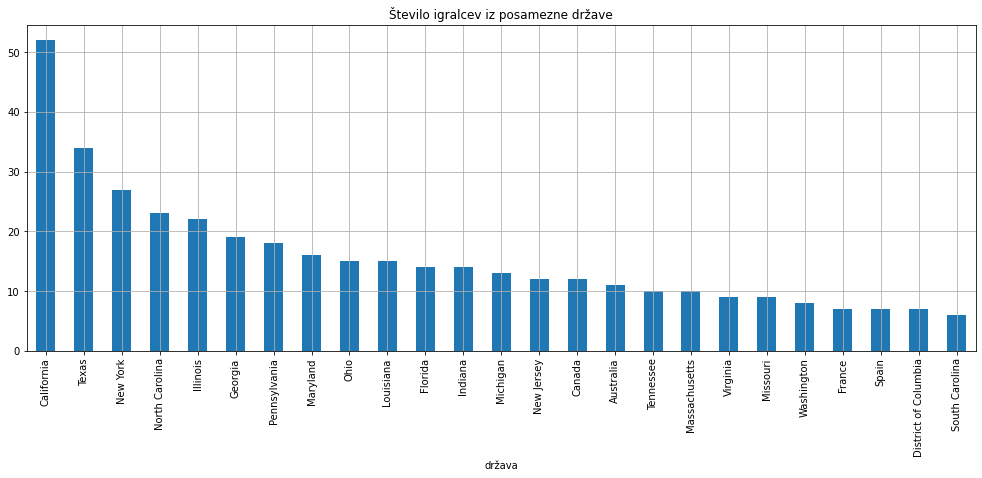

In [139]:
podatki_po_drzavah['ime_priimek'].head(25).plot.bar(title= 'Število igralcev iz posamezne države', figsize=(17,6), grid=True)

#### Višina igralcev glede na pozicijo

C - center (center)  <br>
PF - power forward (krilni center) <br>
SF - small forward (krilo) <br>
SG - shooting guard (branilec) <br>
PG - point guard (organizator igre) <br>

Igralce grupiramo glede na pozicijo na kateri igrajo in predstavimo njihovo višino. V grafu vidimo da imajo najnižjo povprečno višino igralci ki igrajo na poziciji organizatorja igre. Višina igralcev na tej poziciji tudi najbolj varira. Po pričakovanju so najvišji igralci na poziciji centra in krilnega centra.

<AxesSubplot:title={'center':'višina'}, xlabel='pozicija'>

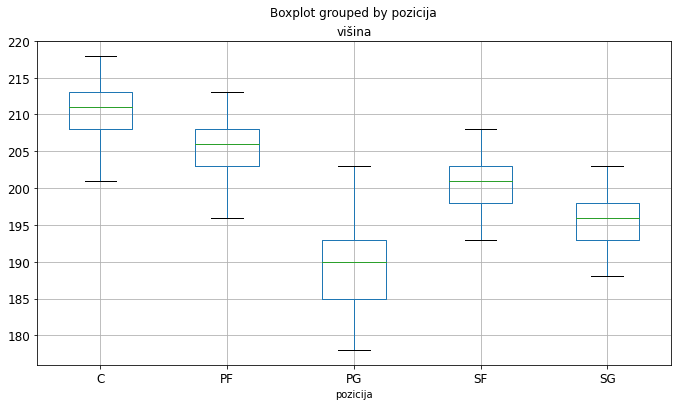

In [39]:
#podatki_po_pozicijah = podatki_surovo.groupby('pozicija', as_index=False)['višina'].mean().sort_values('višina', ascending=False)
#podatki_po_pozicijah = podatki_po_pozicijah.drop([1,3,4,7], axis=0)
podatki_pozicija = podatki_surovo[(podatki_surovo.pozicija !='C,PF')&
                                  (podatki_surovo.pozicija !='PF,SF')&
                                 (podatki_surovo.pozicija !='PF,SG')&
                                 (podatki_surovo.pozicija !='SF,SG')]
podatki_pozicija.boxplot(by='pozicija', column='višina', showfliers=False, figsize=(11,6), fontsize=12, grid=True)
#podatki_surovo.groupby('pozicija').count()

#### Prikaz igralcev glede na starost

S krožnim diagramom bomo predstavili kakšna je bila najpogostejša starost igralcev v sezoni 18/19. Vidimo da je največ igralcev starih od 21 do 26 let, najvišja starost pa je bila kar 41 let.

In [73]:
podatki_starost = podatki_surovo
podatki_starost['starost'] = 2018 - podatki_starost['rojstvo']

Text(0, 0.5, '')

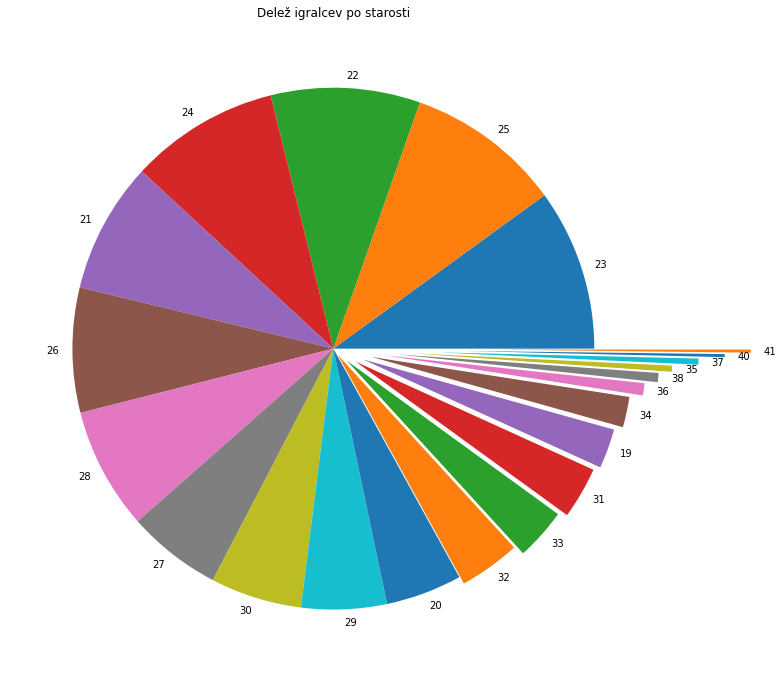

In [35]:
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03,0.07,0.1,0.12, 0.15, 0.2, 0.25, 0.3,0.4, 0.5,0.6)
podatki_starost['starost'].value_counts().plot(kind='pie', figsize=(12, 12), fontsize=10, 
                                               explode=explode, labeldistance=1.05, title='Delež igralcev po starosti')
plt.ylabel('')

#### Povezava med procentom meta in višino/težo igralca

S pomočjo razsevnega diagrama si poglejmo kako višina in teža vplivata na procent meta za tri točke. Za bolj zanesljive podatke sem vzel le igralce, ki so igrali vsaj 10 tekem in metali vsaj 0.5 trojk na tekmo. vidimo, da pri metu za tri točke povezava ni očitna, torej ne velja splošno prepričanje da so višji igralci manj natančni.

In [6]:
def naredi_scatter(stolpec_ena, omejitev_ena, stolpec_dva, omejitev_dva, x, y, title, color):
    podatki_scatter = podatki_surovo[(stolpec_ena >= omejitev_ena) & (stolpec_dva >= omejitev_dva) ]
    podatki_scatter.plot.scatter(x=x, y=y, title=title, color=color)

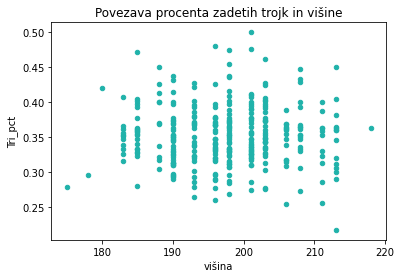

In [18]:
naredi_scatter(podatki_surovo.GP, 10, podatki_surovo.Tri_game, 0.5, 'višina', 'Tri_pct', 
               'Povezava procenta zadetih trojk in višine', "LightSeaGreen")

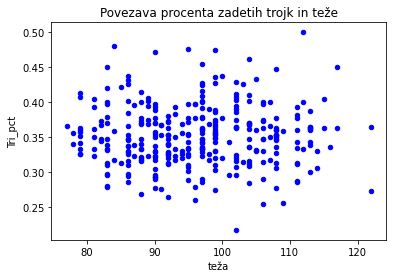

In [17]:
naredi_scatter(podatki_surovo.GP, 10, podatki_surovo.Tri_game, 0.5, 'teža', 'Tri_pct', 
               'Povezava procenta zadetih trojk in teže', "Blue")

Zgornji podatki pa lahko zavajajo, saj meti za tri točke niso najboljše merilo. Višji igralci se manj pogosto odločajo za ta met, kar nam potrdi spodnji razsevni diagram

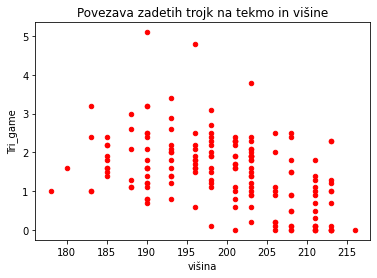

In [36]:
naredi_scatter(podatki_surovo.GP, 10, podatki_surovo.PPG, 10, 'višina', 'Tri_game', 
               'Povezava zadetih trojk na tekmo in višine', "Red")

V spodnjih dveh razsevnih diagramih sem preverjal povezavo med procentom zadetih prostih metov in višino ter težo. Tokrat je mogoče opaziti negativno povezanost med procentom meta in višino oziroma težo igralca. Lahko tudi opazimo, da ima teža večji vpliv kot višina. Prosti meti so tudi bolj natančno merilo saj imajo pri njem vsi igralci enake pogoje, zato lahko potrdimo hipotezo da so višji in težji igralci manj natančni.

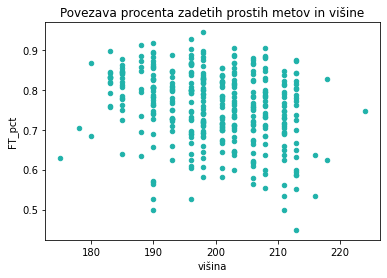

In [15]:
naredi_scatter(podatki_surovo.GP, 10, podatki_surovo.FT_game, 0.5, 'višina', 'FT_pct', 
               'Povezava procenta zadetih prostih metov in višine', "LightSeaGreen")

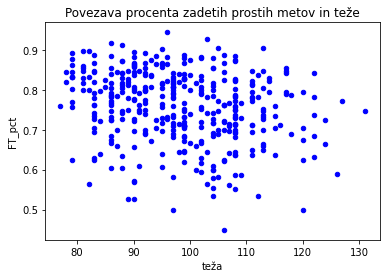

In [14]:
naredi_scatter(podatki_surovo.GP, 10, podatki_surovo.FT_game, 0.5, 'teža', 'FT_pct', 
               'Povezava procenta zadetih prostih metov in teže', "Blue")

#### Kdo ima najboljši in najslabši procent zadetih trojk

Poiščimo igralce z najboljšim procentom zadetih trojk. Za boljšo natančnost postavimo pogoj da je igral vsaj 25 tekem in metal vsaj 0.8 trojk na tekmo. V tabeli res najdemo nekaj najbolj znanih strelcev lige. Zanimivo je, da je na četrtem mestu igralec, ki je visok kar 213 centimetrov.

In [70]:
def naredi_tabelo(stolpec_ena, omejitev_ena, stolpec_dva, omejitev_dva, stolpci_za_prikaz, ureditev, narascujoce):
    return podatki_surovo[(stolpec_ena >= omejitev_ena) & (stolpec_dva >= omejitev_dva)
                         ][ stolpci_za_prikaz ].sort_values(ureditev, ascending = narascujoce).head(10).style.hide_index()

In [69]:
stolpci = ['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 'GP', 'MP_game', 
                     'Tri_game', 'Tri_pct', 'PPG']
naredi_tabelo(podatki_surovo.GP, 25, podatki_surovo.Tri_game, 0.8, stolpci, 'Tri_pct', False)

ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,Tri_game,Tri_pct,PPG
Alex Caruso,196,84,1994,Texas,LAL,PG,25,21.2,1,0.48,9.2
Joe Harris,198,99,1991,Washington,BRK,SG,76,30.2,2.4,0.474,13.7
Danny Green,198,97,1987,New York,TOR,SG,80,27.7,2.5,0.455,10.3
Meyers Leonard,213,117,1992,Illinois,POR,C,61,14.4,0.8,0.45,5.9
Seth Curry,188,83,1990,North Carolina,POR,SG,74,18.9,1.5,0.45,7.9
Dwayne Bacon,198,100,1995,Florida,CHO,SG,43,17.7,0.9,0.437,7.3
Stephen Curry,190,86,1988,Ohio,GSW,PG,69,33.8,5.1,0.437,27.3
Danilo Gallinari,208,105,1988,Italy,LAC,SF,68,30.3,2.4,0.433,19.8
E'Twaun Moore,190,86,1989,Indiana,NOP,SG,53,27.6,1.4,0.432,11.9
Dāvis Bertāns,208,102,1992,Latvia,SAS,PF,76,21.5,1.9,0.429,8


Kdo pa so igralci z najslabšim procentom zadetih metov za tri točke. Tokrat vzamemo strožji pogoj in sicer, da je igral vsaj 40 tekem in metal vsaj 1.5 trojk na tekmo.

In [64]:
stolpci = ['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 
                                  'GP', 'MP_game', 'Tri_game', 'Tri_pct', 'PPG']
naredi_tabelo(podatki_surovo.GP, 40, podatki_surovo.Tri_game, 1.5, stolpci, 'Tri_pct', True)

ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,Tri_game,Tri_pct,PPG
Russell Westbrook,190,90,1988,California,OKC,PG,73,36,1.6,0.29,22.9
Kyle Kuzma,203,99,1995,Michigan,LAL,PF,70,33.1,1.8,0.303,18.7
Kelly Oubre Jr.,201,92,1995,Louisiana,TOT,SF,69,28,1.6,0.32,15.2
Trae Young,185,81,1998,Texas,ATL,PG,81,30.9,1.9,0.324,19.1
Jordan Clarkson,193,87,1992,Florida,CLE,SG,81,27.3,1.8,0.324,16.8
Jrue Holiday,190,92,1990,California,NOP,SG,67,35.9,1.8,0.325,21.2
Devin Booker,196,95,1996,Michigan,PHO,SG,64,35,2.1,0.326,26.6
Luka Dončić,201,98,1999,Slovenia,DAL,SG,72,32.2,2.3,0.327,21.2
Lonzo Ball,198,86,1997,California,LAL,PG,47,30.3,1.6,0.329,9.9
Eric Bledsoe,185,92,1989,Alabama,MIL,PG,78,29.1,1.6,0.329,15.9


#### Kdo ima najboljši in najslabši procent zadetih prostih metov

Poiščimo igralce z najboljšim procentom zadetih prostih metov, pod pogojem da je igral vsaj 25 tekem in metal vsaj 0.5 prostih metov na tekmo.

In [66]:
stolpci = ['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 
                                  'GP', 'MP_game', 'FT_game', 'FT_pct', 'PPG']
naredi_tabelo(podatki_surovo.GP, 25, podatki_surovo.FT_game, 0.5, stolpci, 'FT_pct', False)

ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,FT_game,FT_pct,PPG
Malcolm Brogdon,196,103,1992,Georgia,MIL,SG,64,28.6,2.2,0.928,15.6
Stephen Curry,190,86,1988,Ohio,GSW,PG,69,33.8,3.8,0.916,27.3
Damian Lillard,188,88,1990,California,POR,PG,80,35.5,5.9,0.912,25.8
Danilo Gallinari,208,105,1988,Italy,LAC,SF,68,30.3,5.4,0.904,19.8
Marco Belinelli,196,95,1986,Italy,SAS,SG,79,23,1.4,0.903,10.5
Justin Holiday,198,82,1989,California,TOT,SG,82,31.8,1.2,0.896,10.5
Yogi Ferrell,183,81,1993,Indiana,SAC,PG,71,15,0.8,0.896,5.9
J.J. Redick,190,90,1984,Tennessee,PHI,SG,76,31.3,3,0.894,18.1
Ian Clark,190,79,1991,Tennessee,NOP,SG,60,16.2,0.6,0.892,6.7
Nik Stauskas,198,92,1993,Canada,TOT,SG,68,14.9,0.8,0.891,5.9


Kdo so igralci z najslabšim procentom zadetih prostih metov, pod pogojem da je igral vsaj 40 tekem in metal vsaj 1 prosti met na tekmo.

In [67]:
stolpci = ['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 
           'GP', 'MP_game', 'FT_game', 'FT_pct', 'PPG']
naredi_tabelo(podatki_surovo.GP, 40, podatki_surovo.FT_game, 1, stolpci, 'FT_pct', True)

ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,FT_game,FT_pct,PPG
Hassan Whiteside,213,106,1989,North Carolina,MIA,C,72,23.3,1.5,0.449,12.3
Steven Adams,211,120,1993,New Zealand,OKC,C,80,33.4,1.8,0.5,13.9
Willie Cauley-Stein,213,108,1993,Kansas,SAC,C,81,27.3,1.7,0.551,11.9
Mason Plumlee,211,107,1990,Indiana,DEN,C,82,21.1,1.4,0.561,7.8
Andre Drummond,208,126,1993,New York,DET,C,79,33.5,3.1,0.59,17.3
Mitchell Robinson,213,101,1998,Florida,NYK,C,66,20.6,1.2,0.6,7.3
Ben Simmons,208,104,1996,Australia,PHI,PG,79,34.2,3.3,0.6,16.9
Derrick Jones Jr.,198,95,1997,Pennsylvania,MIA,SF,60,19.2,1.2,0.607,7
Ed Davis,206,102,1989,District of Columbia,BRK,C,81,17.9,1.2,0.617,5.8
Greg Monroe,211,120,1990,Louisiana,TOT,C,43,11.2,1,0.625,5.3


#### Najboljši veterani in mladi igralci

V spodnji tabeli so prikazani najstarejši igralci, ki dosegajo vsaj 10 točk, 3 asistence in 3 skoke na tekmo. Pogoj je tudi da so igrali vsaj 25 tekem v sezoni. Najstarejši igralec, ki mu je to uspelo je bil Dwyane Wade.

In [86]:
def po_starosti(narascujoce, prikazi=10):
    return podatki_starost[(podatki_starost.GP >= 25) & (podatki_starost.PPG >= 10) & 
                (podatki_starost.APG >= 3) & (podatki_starost.RPG >= 3)
              ][['ime_priimek', 'višina', 'teža', 'starost', 'država', 'ekipa', 'pozicija', 
                 'GP', 'MP_game', 'RPG', 'APG', 'PPG']
                                      ].sort_values(['starost', 'PPG'], 
                                                    ascending = [narascujoce, False]).head(prikazi).style.hide_index()

In [87]:
po_starosti(False)

ime_priimek,višina,teža,starost,država,ekipa,pozicija,GP,MP_game,RPG,APG,PPG
Dwyane Wade,193,99,36,Illinois,MIA,SG,72,26.2,4,4.2,15
LeBron James,206,113,34,Ohio,LAL,SF,55,35.2,8.5,8.3,27.4
Chris Paul,185,79,33,North Carolina,HOU,PG,58,32,4.6,8.2,15.6
Marc Gasol,211,115,33,Spain,TOT,C,79,30.8,7.9,4.4,13.6
Trevor Ariza,203,97,33,Florida,TOT,SF,69,34,5.4,3.7,12.5
Lou Williams,185,79,32,Tennessee,LAC,SG,75,26.6,3,5.4,20
Kyle Lowry,183,88,32,Pennsylvania,TOR,PG,65,34,4.8,8.7,14.2
Goran Dragić,190,86,32,Slovenia,MIA,PG,36,27.5,3.1,4.8,13.7
Al Horford,206,111,32,Dominican Republic,BOS,C,68,29,6.7,4.2,13.6
Mike Conley,185,79,31,Arkansas,MEM,PG,70,33.5,3.4,6.4,21.1


Nazadnje si poglejmo še pet najmlajših igralcev, ki dosegajo zgornje pogoje. Najmlajši igralec, ki mu je to uspelo je Luka Dončić.

In [88]:
po_starosti(True, 5)

ime_priimek,višina,teža,starost,država,ekipa,pozicija,GP,MP_game,RPG,APG,PPG
Luka Dončić,201,98,19,Slovenia,DAL,SG,72,32.2,7.8,6,21.2
Trae Young,185,81,20,Texas,ATL,PG,81,30.9,3.7,8.1,19.1
Brandon Ingram,201,86,21,North Carolina,LAL,SF,52,33.8,5.1,3,18.3
Jamal Murray,193,91,21,Canada,DEN,PG,75,32.6,4.2,4.8,18.2
De'Aaron Fox,190,83,21,Louisiana,SAC,PG,81,31.4,3.8,7.3,17.3


#### Zaključek

Ugotovili smo, da višina in teža igralca ne vplivata na procent zadetih metov za tri točke, vendar je pomembno poudariti, da se višji igralci manj pogosto odločijo za tak met. Drugače je pri prostih metih, kjer pa res velja splošna prepričanost da imajo višji in težji igralci manj natančen met.